In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data = pd.merge(city, ride, on = "city")

# Display the data table for preview
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
urban = data.loc[(data["type"] == "Urban")]
suburban = data.loc[(data["type"] == "Suburban")]
rural = data.loc[(data["type"] == "Rural")]

## Bubble Plot of Ride Sharing Data

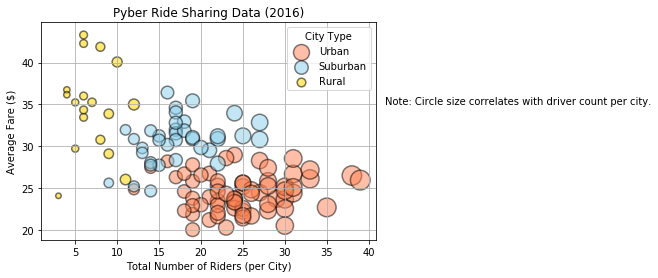

In [3]:
# Obtain the x and y coordinates for each of the three city types
# urban
urban_avg_fare = urban.groupby(['city'])['fare'].mean()
urban_tot_rides = urban.groupby(['city']).count()['ride_id']
urban_tot_drivers = urban.groupby(['city'])['driver_count'].value_counts()

# suburban
suburban_avg_fare = suburban.groupby(['city'])['fare'].mean()
suburban_tot_rides = suburban.groupby(['city']).count()['ride_id']
suburban_tot_drivers  = suburban.groupby(['city'])['driver_count'].value_counts()

# rural
rural_avg_fare = rural.groupby(['city'])['fare'].mean()
rural_tot_rides = rural.groupby(['city']).count()['ride_id']
rural_tot_drivers = rural.groupby(['city'])['driver_count'].value_counts() 

# Build the scatter plots for each city types
plt.scatter(urban_tot_rides, urban_avg_fare, s=urban_tot_drivers*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban", linewidth = 1.5)

plt.scatter(suburban_tot_rides, suburban_avg_fare, s=suburban_tot_drivers*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.5, label="Suburban", linewidth = 1.5)

plt.scatter(rural_tot_rides, rural_avg_fare, s=rural_tot_drivers*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural", linewidth = 1.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(title = "City Type", loc = "best")

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber Ride Sharing 2016.png")

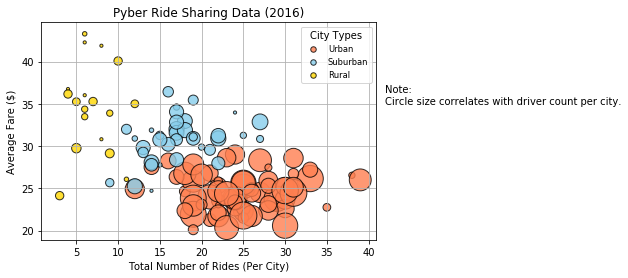

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

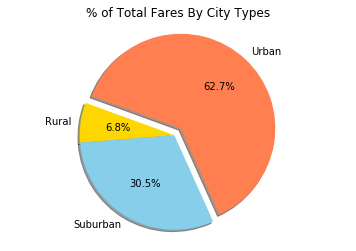

In [4]:
# Calculate Type Percents
total_fare = data.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Fares by City Types.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

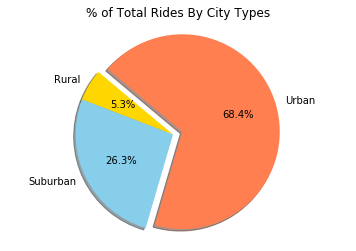

In [6]:
# Calculate Ride Percents
total_rides = data.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Rides by City Types.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

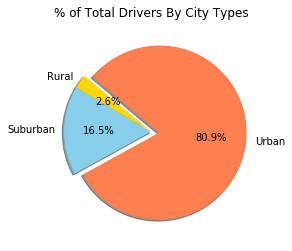

In [8]:
# Calculate Driver Percents
total_drivers = city.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","coral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("% of Total Drivers by City Types.png")

In [9]:
# Show Figure
plt.show()

Pyber Analysis
- We can see that there are likely to be more drivers in a city type where there are more riders. 
- It looks like the number of drivers in different Rural cities is about the same. This could be the cause of the larger ride fare within Rural cities. 
- With the larger number of drivers and riders in Urban cities, the frequency of ride sharing may be more often. Here, the higher frequency of riders may lead to lower fares. 
- Although Rural cities have larger fares, the Urban city type still has the highest percentage of total fares.